# Mega Millions Lottery Analysis
Have you ever wondered what numbers those lucky lottery winners pick, which numbers are the luckiest, and which days are the luckiest. 

I'll reveal what you might wonder about by analyzing every lottery number and jackpot winner since 2002.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

winning_numbers_df = pd.read_csv('megaMillionsWinningNumbersBeginning2002.csv')

winners_df = pd.read_csv('megaMillionWinner.csv')

We import necessary libraries for data manipulation and visualization.
Using pd.read_csv(), we load both CSV files into pandas DataFrames.

**Question 1:**  Most Selected Mega Ball

In [63]:
merged_df = pd.merge(winning_numbers_df, winners_df, on='Draw Date', how='inner')

mega_ball_counts = merged_df['Mega Ball'].value_counts()
most_common_mega_ball = mega_ball_counts.idxmax()
print(f"\nMost Frequent Mega Ball: {most_common_mega_ball} (Occurred {mega_ball_counts.max()} times)")


Most Frequent Mega Ball: 10 (Occurred 10 times)


Merge datasets on 'Draw Date' using inner join to keep only winning dates

The value_counts() method counts how many times each Mega Ball number appears in the dataset.

idxmax() returns the index (Mega Ball number) with the highest count.

In [64]:
mega_ball_counts = winning_numbers_df['Mega Ball'].value_counts()
most_common_mega_ball = mega_ball_counts.idxmax()
print(f"\nMost Frequent Mega Ball: {most_common_mega_ball} (Occurred {mega_ball_counts.max()} times)")


Most Frequent Mega Ball: 9 (Occurred 92 times)


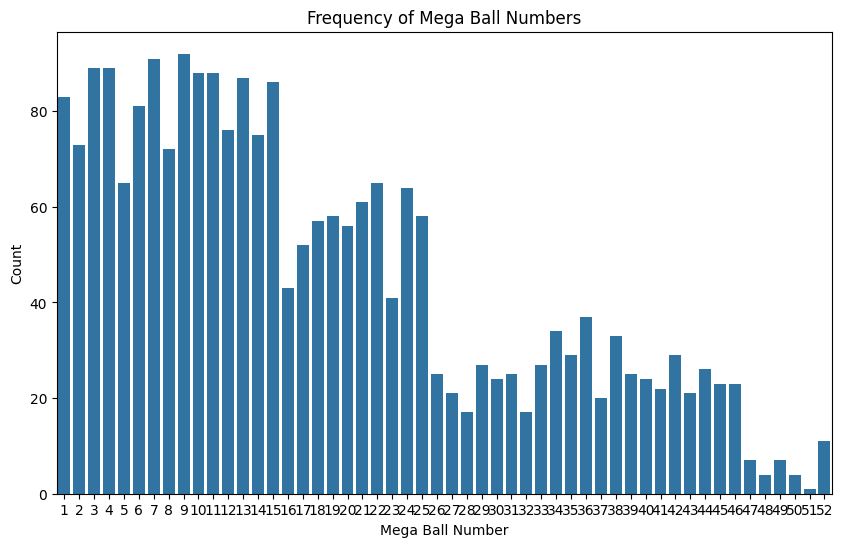

In [65]:
# Visualization
plt.figure(figsize=(10,6))
colors = sns.color_palette('viridis', len(mega_ball_counts))
sns.barplot(x=mega_ball_counts.index, y=mega_ball_counts.values)
plt.title('Frequency of Mega Ball Numbers')
plt.xlabel('Mega Ball Number')
plt.ylabel('Count')
plt.show()

**Fun Fact**  
There are six different versions of Mega million With each newer version Jackpot's probability gets lower

and the 51 that appears here as the least-occurring mega ball only appeared in lottery tickets sold from May 15, 2002, to June 22, 2005.

**Question 2:** Top Five Choose Winning Numbers

In [66]:
winning_numbers_expanded = merged_df['Winning Numbers'].str.split(' ', expand=True).astype(int)
winning_numbers_expanded.columns = ['Number1', 'Number2', 'Number3', 'Number4', 'Number5']
all_winning_numbers = pd.melt(winning_numbers_expanded)['value']

winning_number_counts = all_winning_numbers.value_counts()
top_five_winning_numbers = winning_number_counts.head(5)
print("\nTop Five Most Frequent Winning Numbers:")
print(top_five_winning_numbers)


Top Five Most Frequent Winning Numbers:
value
39    35
2     31
24    27
23    26
12    25
Name: count, dtype: int64


The str.split() method splits the Winning Numbers string into separate components based on spaces. The expand=True parameter ensures that each number gets its own column.

The split numbers are converted to integers using astype(int).

The pd.melt() function transforms the DataFrame from wide to long format, consolidating all winning numbers into a single column.

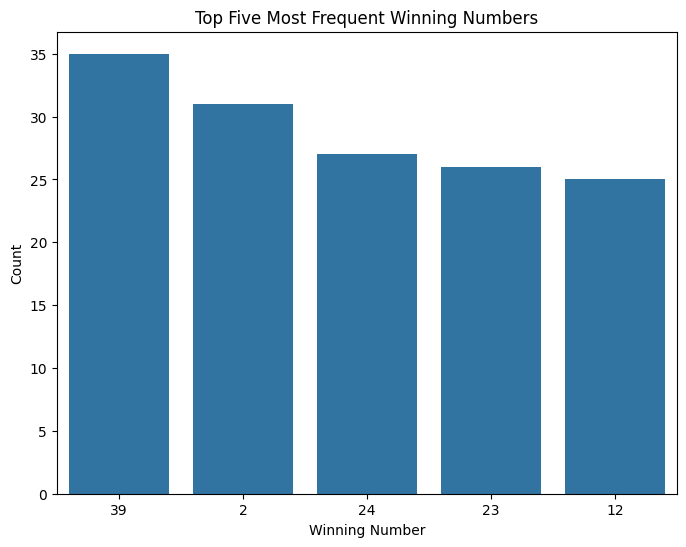

In [67]:
# Visualization
plt.figure(figsize=(8,6))
sns.barplot(x=top_five_winning_numbers.index.astype(str), y=top_five_winning_numbers.values)
plt.title('Top Five Most Frequent Winning Numbers')
plt.xlabel('Winning Number')
plt.ylabel('Count')
plt.show()

**Question 3:** Tuesday or Friday?

Since the mega million is drawn on Tuesdays and Fridays, including holidays, we wanted to see exactly what days of the week the jackpot had a higher chance of being drawn!

In [68]:
winning_numbers_df['Draw Date'] = pd.to_datetime(winning_numbers_df['Draw Date'])
winners_df['Draw Date'] = pd.to_datetime(winners_df['Draw Date'])

merged_df = pd.merge(winning_numbers_df, winners_df, on='Draw Date', how='inner')
merged_df = pd.concat([merged_df, winning_numbers_expanded], axis=1)
merged_df['Day of Week'] = merged_df['Draw Date'].dt.day_name()

day_counts = merged_df['Day of Week'].value_counts().reindex(['Tuesday', 'Friday']).fillna(0).astype(int)

total_draws = day_counts.sum()
prob_tuesday = day_counts['Tuesday'] / total_draws
prob_friday = day_counts['Friday'] / total_draws

print(f"\nTotal Number of Wins: {total_draws}")
print(f"Wins on Tuesday: {day_counts['Tuesday']} times ({prob_tuesday:.2%})")
print(f"Wins on Friday: {day_counts['Friday']} times ({prob_friday:.2%})")


Total Number of Wins: 217
Wins on Tuesday: 100 times (46.08%)
Wins on Friday: 117 times (53.92%)


The Draw Date columns in both DataFrames are converted to datetime objects using pd.to_datetime() to ensure proper alignment during merging.

Convert 'Draw Date' to datetime format

value_counts() counts how many wins occurred on each day of the week. The reindex() method ensures that only 'Tuesday' and 'Friday' are considered, filling missing values with 0.

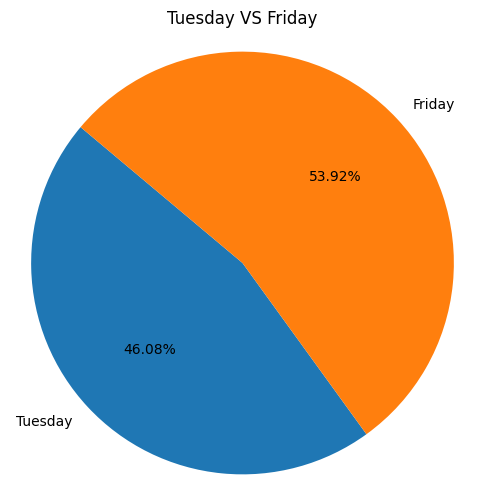

In [77]:
# Visualization
labels = ['Tuesday', 'Friday']
sizes = [day_counts['Tuesday'], day_counts['Friday']]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140)
plt.title('Tuesday VS Friday')
plt.axis('equal')
plt.show()

**Question 4:** Which Day is the luckiest?

In [70]:
merged_df['Day'] = merged_df['Draw Date'].dt.day
day_of_month_counts = merged_df['Day'].value_counts().sort_index()
threshold = day_of_month_counts.mean() + day_of_month_counts.std()
frequent_days = day_of_month_counts[day_of_month_counts >= threshold]

print("\nDays with Most Wins:")
print(frequent_days)


Days with Most Wins:
Day
1     14
11    10
16    13
22    11
27    12
Name: count, dtype: int64


The .dt.day attribute extracts the day (1-31) from the Draw Date.

value_counts() tallies the number of wins for each day of the month.

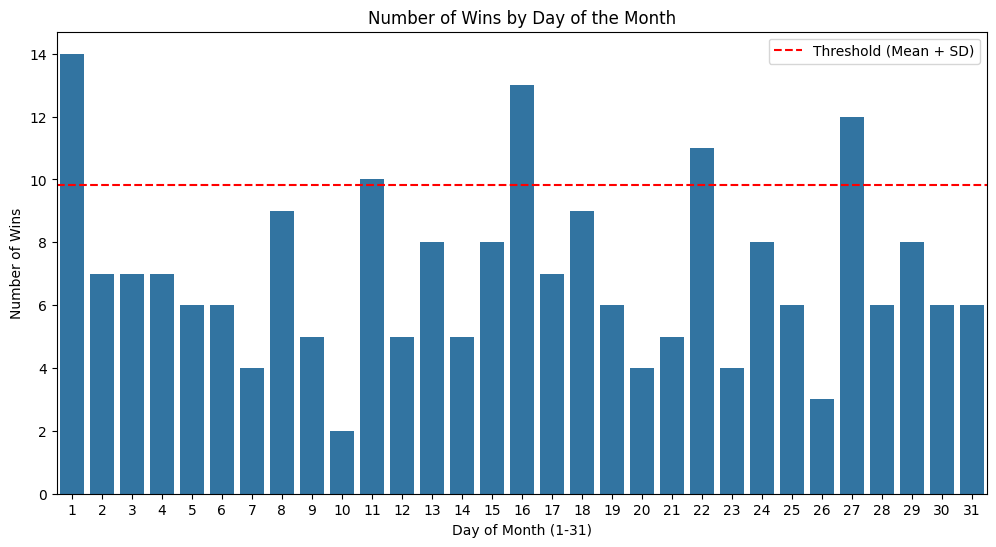

In [71]:
# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x=day_of_month_counts.index, y=day_of_month_counts.values)
plt.axhline(threshold, color='red', linestyle='--', label='Threshold (Mean + SD)')
plt.title('Number of Wins by Day of the Month')
plt.xlabel('Day of Month (1-31)')
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

**Question 5:** Comparison of Average Winning Numbers

In [72]:
winning_draws_winning_numbers = merged_df[['Number1', 'Number2', 'Number3', 'Number4', 'Number5']]
average_winning_draws = winning_draws_winning_numbers.values.mean()
print(f"\nAverage of Winning Numbers on Winning Dates: {average_winning_draws:.2f}")

all_draws_winning_numbers = winning_numbers_df[['Winning Numbers']].copy()
all_draws_winning_numbers_expanded = all_draws_winning_numbers['Winning Numbers'].str.split(' ', expand=True).astype(int)
average_all_draws = all_draws_winning_numbers_expanded.values.mean()

print(f"Average of All Winning Numbers Across All Draws: {average_all_draws:.2f}")


Average of Winning Numbers on Winning Dates: 29.23
Average of All Winning Numbers Across All Draws: 31.70


We select the columns containing the winning numbers (Number1 to Number5) from the merged_df

The .mean() function calculates the average of all these numbers across winning dates.

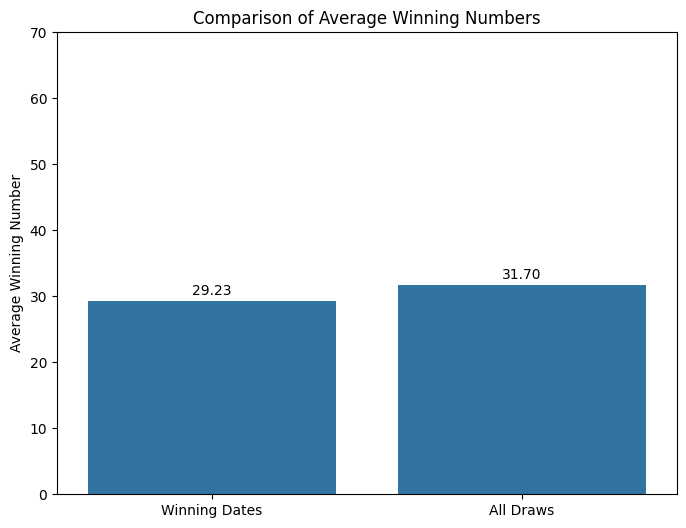

In [73]:
# Visualization
plt.figure(figsize=(8,6))
sns.barplot(x=['Winning Dates', 'All Draws'], y=[average_winning_draws, average_all_draws])
plt.title('Comparison of Average Winning Numbers')
plt.ylabel('Average Winning Number')
plt.ylim(0, 70)  # Adjust based on number range
plt.text(0, average_winning_draws + 1, f"{average_winning_draws:.2f}", ha='center')
plt.text(1, average_all_draws + 1, f"{average_all_draws:.2f}", ha='center')
plt.show()

**Question 6:** Consecutive?

In [74]:
def has_consecutive(numbers):
    sorted_numbers = sorted(numbers)
    for i in range(len(sorted_numbers)-1):
        if sorted_numbers[i+1] - sorted_numbers[i] == 1:
            return True
    return False

merged_df['Has_Consecutive'] = merged_df[['Number1', 'Number2', 'Number3', 'Number4', 'Number5']].apply(lambda row: has_consecutive(row), axis=1)

total_draws = merged_df.shape[0]
draws_with_consecutive = merged_df['Has_Consecutive'].sum()
percentage_consecutive = (draws_with_consecutive / total_draws) * 100

print(f"\nTotal Number of Draws: {total_draws}")
print(f"Draws with at least one pair of consecutive numbers: {draws_with_consecutive} ({percentage_consecutive:.2f}%)")




Total Number of Draws: 217
Draws with at least one pair of consecutive numbers: 59 (27.19%)


Function to check for consecutive numbers in a sorted list

Apply the function to each draw

Calculate the number and percentage of draws with consecutive numbers

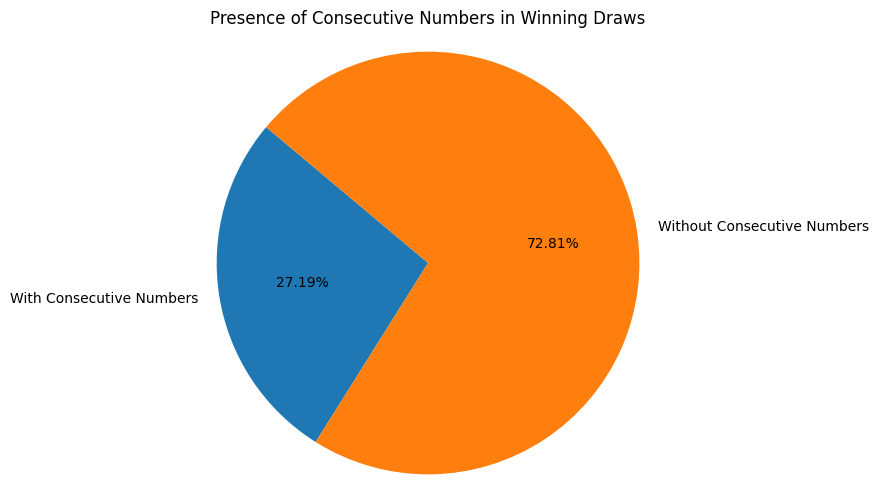

In [75]:
# Visualization
labels = ['With Consecutive Numbers', 'Without Consecutive Numbers']
sizes = [draws_with_consecutive, total_draws - draws_with_consecutive]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140)
plt.title('Presence of Consecutive Numbers in Winning Draws')
plt.axis('equal')
plt.show()